# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t

df = pd.read_csv('data/human_body_temperature.csv')

### 1. Is the distribution of body temperatures normal?

From below chart, it shows that the body temperature distribution is normally distributed.

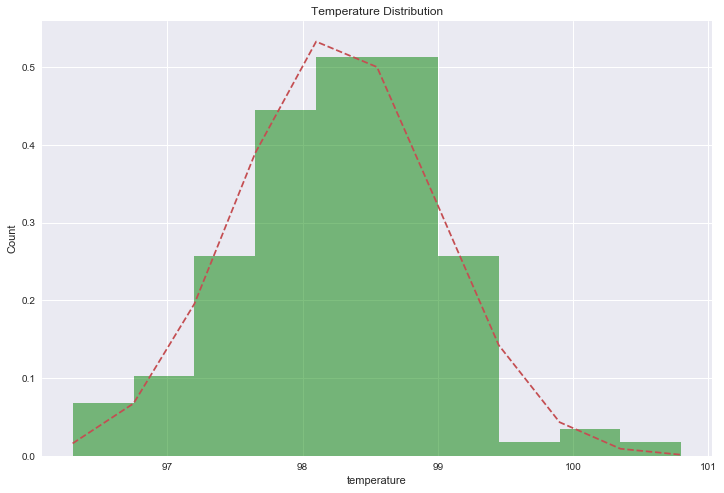

In [3]:
sns.set(color_codes=True)
plt.figure(figsize = (12, 8))
n, bins, patches = plt.hist(df['temperature'], 10, normed=1, facecolor='green', alpha=0.5)
y = mlab.normpdf(bins, df['temperature'].mean(), df['temperature'].std())
plt.xlabel('temperature')
plt.ylabel('Count')
plt.title('Temperature Distribution')
plt.plot(bins, y, 'r--')
plt.show()
plt.gcf().clear()

### 2. Is the sample size large? Are the observations independent?
130 sample size is larage enough for rule of thumb sample size being 30.  Observations are independent because all these 130 samples are from 130 different people.

In [4]:
len(df)

130

### 3. Is the true population mean really 98.6 degrees F?
### Would you use a one-sample or two-sample test? Why?
### In this situation, is it appropriate to use the  t  or  z  statistic?
### Now try using the other test. How is the result be different? Why?

One-sample test is used because all 130 samples fall into the same group with one mean while we test if the true population mean is 98.6F.

z statistic is used because a. The sample standard deviation is known and b. Sample size is large enough for CLT to be applied.

The hypothesis is constructed as follows:

H0: mean temperature = 98.6F

H1: mean temperature != 98.6F

A two side test is used.

We observe that the p-values obtained from both z and t statistics are far below 0.05, we reject the null hypothesis. The population mean is not 98.6.

In [5]:
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [6]:
z_score = (df['temperature'].mean() - 98.6) / (df['temperature'].std() / np.sqrt(len(df)))
p_value_z_stats = norm.cdf(z_score) * 2
p_value_z_stats

4.9021570141012155e-08

In [7]:
t_score = (df['temperature'].mean() - 98.6) / (df['temperature'].std() / np.sqrt(len(df)))
p_value_t_stats = 2*(t.cdf(t_score, (len(df)-1)))
p_value_t_stats

2.4106320415561276e-07

### 4. Draw a small sample of size 10 from the data and repeat both tests.
### Which one is the correct one to use?
### What do you notice? What does this tell you about the difference in application of the t  and  z  statistic?

t staistic is the correct one to use for small sample size < 30. 

In [17]:
resample = np.random.choice(df['temperature'], 10)
resample

array([ 100. ,   97.8,   99.1,   99. ,   97.2,   99.2,   98.2,   98.2,
         98.6,   97.9])

In [18]:
z_score = (resample.mean() - 98.6) / (resample.std() / np.sqrt(len(df)))
p_value_z_stats = norm.cdf(z_score) * 2
p_value_z_stats

0.24192842098729628

In [19]:
t_score = (resample.mean() - 98.6) / (resample.std() / np.sqrt(len(df)))
p_value_t_stats = 2*(t.cdf(t_score, (len(df)-1)))
p_value_t_stats

0.24408575360830254

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
### Start by computing the margin of error and confidence interval.

Setting at 95% of confidence level for two tails, z-score = 1.96 according to norm.ppf(0.975) 

Margin of error = sample mean +/- (critical value (z score) x standard deviation of sample mean)

Margin of error with 95% of confidence level and sample mean 98.249230769230749 = [98.123196428181629, 98.375265110279869]

In [29]:
margin_of_error = [df['temperature'].mean() - 
                   abs(norm.ppf((1-0.95)/2)) * df['temperature'].std() / np.sqrt(len(df)),
                   df['temperature'].mean() + 
                   abs(norm.ppf((1-0.95)/2)) * df['temperature'].std() / np.sqrt(len(df))]
margin_of_error

[98.123196428181629, 98.375265110279869]

### 6. Is there a significant difference between males and females in normal temperature?
### What test did you use and why?
### Write a story with your conclusion in the context of the original problem.

Two-sample z-test was used because of assuming that both male and female samples are normally distributed, independent and all sizes are greater than 30.

So the hypothesis is constructed as below:

H0: Mean of male temperature - Mean of female temperature = 0

H1: Mean of male temperature != Mean of female temperature

Below shows that the p-value yields 0.022287360760657488.

It depends on how stringent the pre-specified significance level is defined.  If the pre-specified significance level is defined as 0.05, the null hypothesis of equal means could be rejected.  If the specified significance level had been the more conservative (more stringent) α < 0.01, however, the null hypothesis could not be rejected.

In [36]:
male_df = df[df.gender=='M']
female_df = df[df.gender=='F']
len(male_df), len(female_df)

(65, 65)

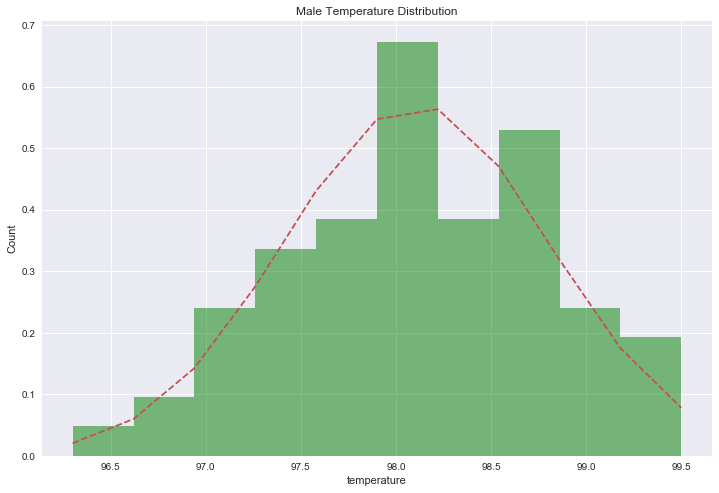

In [39]:
sns.set(color_codes=True)
plt.figure(figsize = (12, 8))
n, bins, patches = plt.hist(male_df.temperature, 10, normed=1, facecolor='green', alpha=0.5)
y = mlab.normpdf(bins, male_df.temperature.mean(), male_df.temperature.std())
plt.xlabel('temperature')
plt.ylabel('Count')
plt.title('Male Temperature Distribution')
plt.plot(bins, y, 'r--')
plt.show()
plt.gcf().clear()

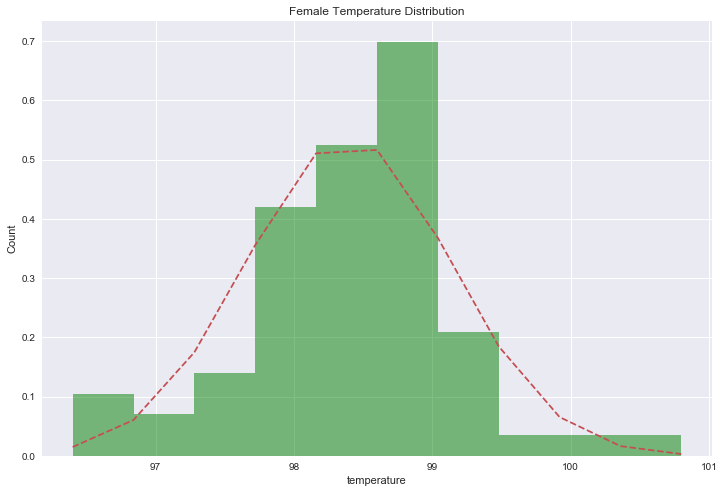

In [42]:
sns.set(color_codes=True)
plt.figure(figsize = (12, 8))
n, bins, patches = plt.hist(female_df.temperature, 10, normed=1, facecolor='green', alpha=0.5)
y = mlab.normpdf(bins, female_df.temperature.mean(), female_df.temperature.std())
plt.xlabel('temperature')
plt.ylabel('Count')
plt.title('Female Temperature Distribution')
plt.plot(bins, y, 'r--')
plt.show()
plt.gcf().clear()

In [47]:
z_score = (male_df.temperature.mean() - female_df.temperature.mean() - 0) / np.sqrt(male_df.temperature.var() / len(male_df) + female_df.temperature.var() / len(female_df))
p_value_z_stats = norm.cdf(z_score) * 2
p_value_z_stats

0.022287360760657488